In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore")

In [2]:
clients = pd.read_parquet("data/clients.parquet")
customer_behavior = pd.read_parquet("data/customer_behavior.parquet")
employees = pd.read_parquet("data/employees.parquet")
financial_transaction = pd.read_parquet("data/financial_transactions.parquet")
marketing_campaigns = pd.read_parquet("data/marketing_campaigns.parquet")
projects = pd.read_parquet("data/projects.parquet")
sales = pd.read_parquet("data/sales.parquet")

In [3]:
sales.head()

,sales_id,product_service_id,customer_id,employee_id,sale_date,quantity,unit_price,discount,total_amount
0,1,d2c3fda4-de9b-4326-97bf-e7603ca7a451,142,19,2022-06-10,3,254.36,0.29,541.79
1,2,dd0cdec9-f20a-4be6-80ae-93d0c3c1cde7,159,36,2023-01-25,5,141.35,0.01,699.68
2,3,122ef57a-e75d-4d66-8365-bcd317d34266,98,3,2022-05-12,10,308.13,0.27,2249.35
3,4,4b4cd165-2c6c-43cd-8ead-ea068bbece2b,152,18,2022-07-15,6,245.20,0.26,1088.69
4,5,573cf38a-ac68-49cb-b063-11eb9cb0d74e,71,20,2023-03-17,8,364.30,0.28,2098.37


# 1. Exploratory Data Analysis

,client_id,client_name,industry,country,state,city,contact_name,contact_email,contact_phone_number
0,1,Valentine-Lopez,Public relations officer,Saint Vincent and the Grenadines,Tennessee,East Francisburgh,Taylor Thornton,edwardleonard@example.org,869-574-3355x92082
1,2,Martin PLC,Homeopath,Samoa,New Jersey,Port Aaron,Brian Johnson,jimmyhammond@example.com,271-156-1100
2,3,"Hamilton, Smith and Moran",Commissioning editor,British Indian Ocean Territory (Chagos Archipe...,Maine,Nataliefort,Steven Mendoza,ugraham@example.com,(709)037-5675
3,4,Morrison and Sons,Equities trader,France,Hawaii,Michaelshire,Douglas Thompson,fwilson@example.org,+1-018-217-9912x78475
4,5,Avila-Callahan,Ceramics designer,Liberia,New Jersey,New Christopherfurt,Michael Jones,carolrogers@example.com,001-797-199-4431x192


,client_id,client_name,industry,country,state,city,contact_name,contact_email,contact_phone_number
count,100.000000,100,100,100,100,100,100,100,100
unique,NaN,99,93,82,42,100,100,100,100
top,NaN,Smith and Sons,Secondary school teacher,Lithuania,Alaska,East Francisburgh,Taylor Thornton,edwardleonard@example.org,869-574-3355x92082
freq,NaN,2,3,2,6,1,1,1,1
mean,50.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


client_id               0
client_name             0
industry                0
country                 0
state                   0
city                    0
contact_name            0
contact_email           0
contact_phone_number    0
dtype: int64

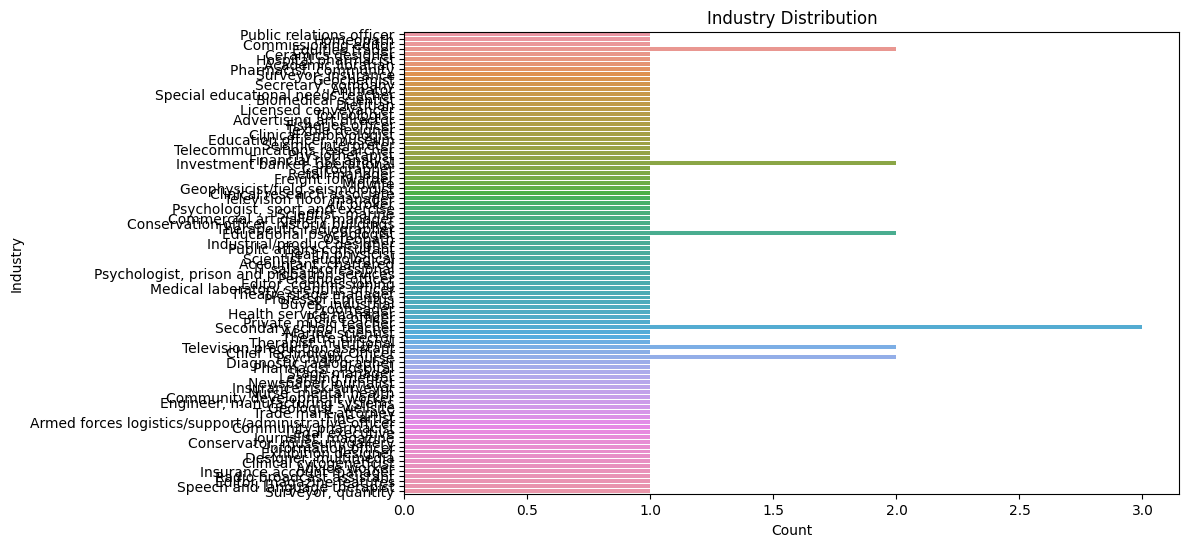

In [4]:
# Display the first few rows of the clients DataFrame
display(clients.head())

# Get summary statistics
display(clients.describe(include='all'))

# Check for missing values
display(clients.isnull().sum())

# Plot the distribution of industries
plt.figure(figsize=(10, 6))
sns.countplot(data=clients, y='industry')
plt.title('Industry Distribution')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()


,customer_id,age,gender,country,state,city,total_spending,preferred_communication_channel
0,1,27,F,Israel,Washington,Martinberg,4430.76,email
1,2,20,M,Samoa,Illinois,Lutzbury,1887.48,phone
2,3,43,M,Denmark,Maine,Carsonbury,2895.09,in-person
3,4,39,M,Cambodia,New Jersey,Johnsonmouth,5464.26,in-person
4,5,51,F,Macao,Kansas,Davidstad,9524.14,in-person


,customer_id,age,gender,country,state,city,total_spending,preferred_communication_channel
count,200.000000,200.000000,200,200,200,200,200.000000,200
unique,NaN,NaN,2,130,48,199,NaN,3
top,NaN,NaN,M,Samoa,Minnesota,North Anthony,NaN,email
freq,NaN,NaN,108,4,10,2,NaN,74
mean,100.500000,43.365000,NaN,NaN,NaN,NaN,5318.633050,NaN
std,57.879185,15.245125,NaN,NaN,NaN,NaN,3051.419331,NaN
min,1.000000,18.000000,NaN,NaN,NaN,NaN,120.840000,NaN
25%,50.750000,31.000000,NaN,NaN,NaN,NaN,2874.062500,NaN
50%,100.500000,42.000000,NaN,NaN,NaN,NaN,5415.725000,NaN
75%,150.250000,57.000000,NaN,NaN,NaN,NaN,8190.607500,NaN


customer_id                        0
age                                0
gender                             0
country                            0
state                              0
city                               0
total_spending                     0
preferred_communication_channel    0
dtype: int64

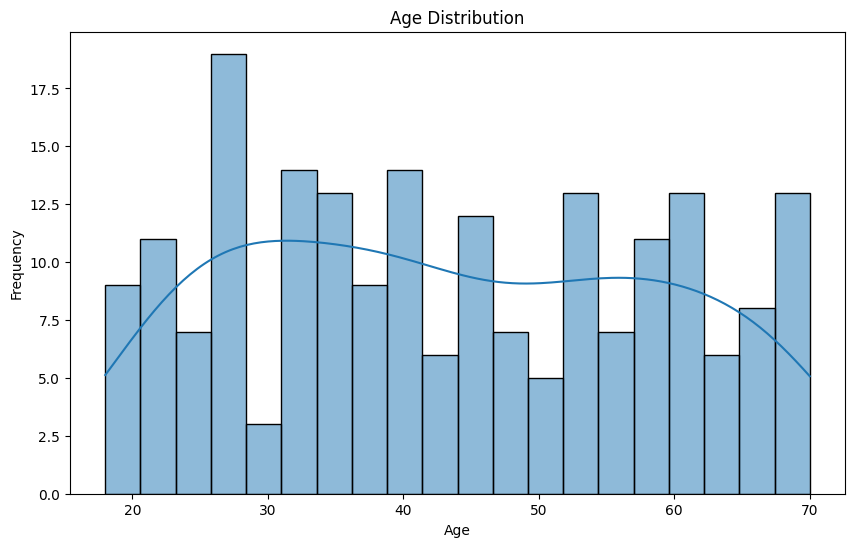

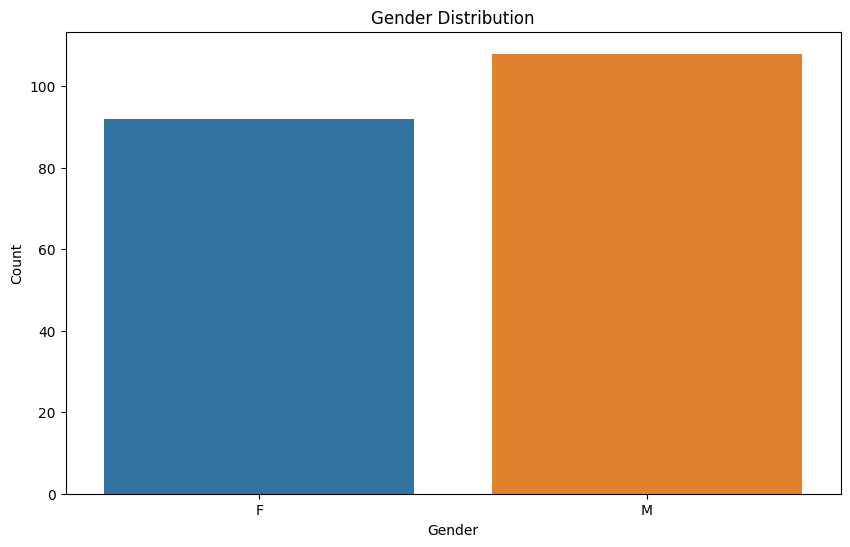

In [5]:
# Display the first few rows of the customer_behavior DataFrame
display(customer_behavior.head())

# Get summary statistics
display(customer_behavior.describe(include='all'))

# Check for missing values
display(customer_behavior.isnull().sum())

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(customer_behavior['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of gender
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_behavior, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


,employee_id,first_name,last_name,email,job_title,department,hire_date,country,state,city
0,1,Shannon,Mccann,allenayers@example.net,Games developer,Consulting,2022-05-06,Fiji,North Dakota,Skinnertown
1,2,Madison,Rose,burtondaniel@example.net,Government social research officer,Advisory,2014-08-21,Pitcairn Islands,New Jersey,Porterstad
2,3,Melissa,Mckinney,lmarshall@example.com,"Scientist, clinical (histocompatibility and im...",Advisory,2020-05-05,Rwanda,Louisiana,East Jenniferberg
3,4,Jennifer,Johnson,davidmartin@example.org,Cartographer,Advisory,2022-07-10,Macao,Hawaii,South Barbara
4,5,Amy,Galloway,chadhammond@example.net,Commissioning editor,Advisory,2021-06-20,Bosnia and Herzegovina,Vermont,West Anita


,employee_id,first_name,last_name,email,job_title,department,hire_date,country,state,city
count,50.00000,50,50,50,50,50,50,50,50,50
unique,NaN,44,43,50,44,4,50,46,34,50
top,NaN,Elizabeth,Johnson,allenayers@example.net,Games developer,Advisory,2022-05-06,Colombia,North Carolina,Skinnertown
freq,NaN,3,3,1,2,16,1,2,3,1
mean,25.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.57738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,25.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


employee_id    0
first_name     0
last_name      0
email          0
job_title      0
department     0
hire_date      0
country        0
state          0
city           0
dtype: int64

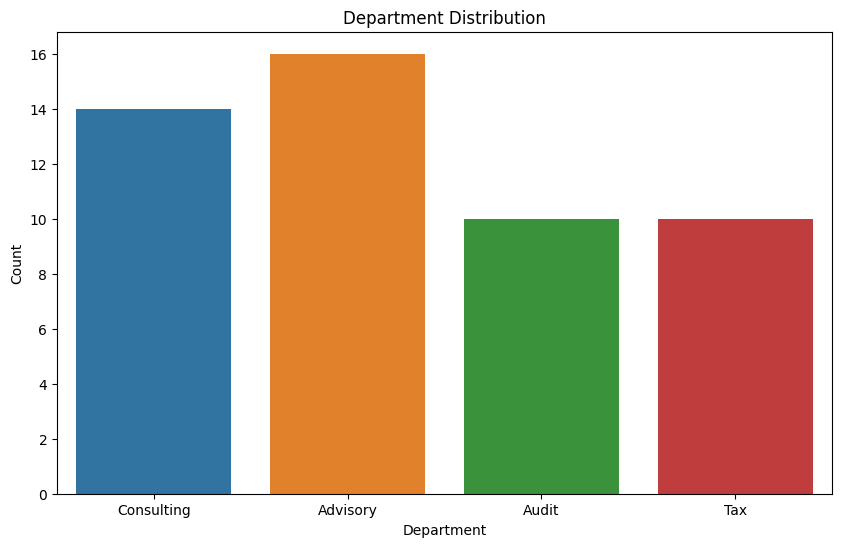

In [6]:
# Display the first few rows of the employees DataFrame
display(employees.head())

# Get summary statistics
display(employees.describe(include='all'))

# Check for missing values
display(employees.isnull().sum())

# Plot the distribution of departments
plt.figure(figsize=(10, 6))
sns.countplot(data=employees, x='department')
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


,transaction_id,project_id,employee_id,client_id,transaction_date,transaction_type,amount,currency,description
0,1,71,31,69,2023-01-12,Invoice,7933.47,USD,Great case month believe. Them mission air eig...
1,2,20,39,42,2022-10-12,Invoice,2075.83,USD,Action worker relate figure catch. Computer ch...
2,3,84,31,52,2022-06-23,Payment,1963.27,USD,Road myself amount accept however they cultura...
3,4,132,30,33,2022-08-21,Invoice,1779.30,USD,Often lead prepare. Establish rise down stuff ...
4,5,132,28,44,2022-06-21,Payment,5445.19,USD,North from skill might. Little make throw huma...


,transaction_id,project_id,employee_id,client_id,transaction_date,transaction_type,amount,currency,description
count,500.000000,500.000000,500.000000,500.00000,500,500,500.000000,500,500
unique,NaN,NaN,NaN,NaN,280,3,NaN,1,500
top,NaN,NaN,NaN,NaN,2022-09-12,Invoice,NaN,USD,Great case month believe. Them mission air eig...
freq,NaN,NaN,NaN,NaN,5,175,NaN,500,1
mean,250.500000,103.558000,24.658000,50.77800,NaN,NaN,5100.133060,NaN,NaN
std,144.481833,57.734888,14.612189,28.55871,NaN,NaN,2834.144853,NaN,NaN
min,1.000000,2.000000,1.000000,1.00000,NaN,NaN,108.690000,NaN,NaN
25%,125.750000,55.000000,12.000000,26.75000,NaN,NaN,2614.562500,NaN,NaN
50%,250.500000,106.500000,24.000000,52.00000,NaN,NaN,5196.450000,NaN,NaN
75%,375.250000,154.250000,37.000000,76.00000,NaN,NaN,7552.645000,NaN,NaN


transaction_id      0
project_id          0
employee_id         0
client_id           0
transaction_date    0
transaction_type    0
amount              0
currency            0
description         0
dtype: int64

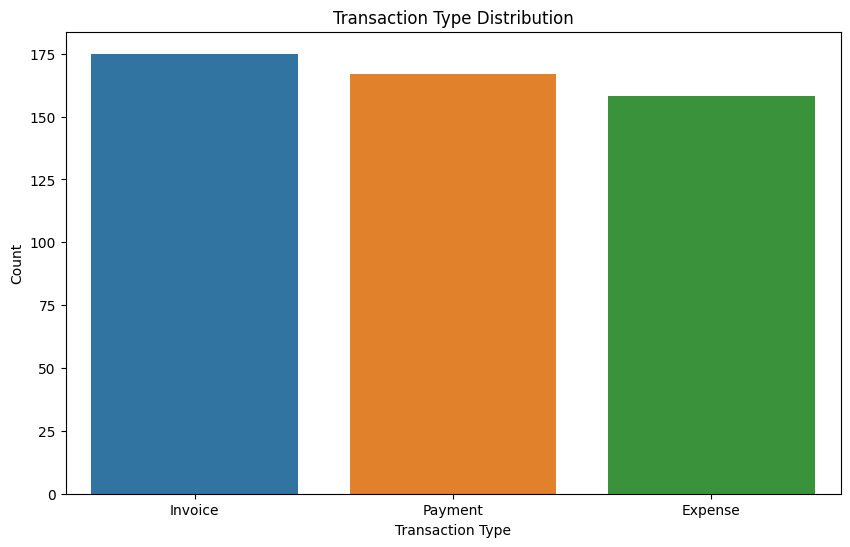

In [7]:
# Display the first few rows of the financial_transaction DataFrame
display(financial_transaction.head())

# Get summary statistics
display(financial_transaction.describe(include='all'))

# Check for missing values
display(financial_transaction.isnull().sum())

# Plot the distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(data=financial_transaction, x='transaction_type')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


,campaign_id,campaign_name,start_date,end_date,channel,target_audience,budget,leads_generated,conversions
0,1,Cloned real-time toolset,2022-05-16,2023-08-20,email,"Teacher, secondary school",9103.20,22,2
1,2,Secured maximized toolset,2022-11-04,2023-08-26,email,"Nurse, learning disability",4557.20,33,7
2,3,Managed scalable array,2022-12-27,2024-03-07,email,Solicitor,3701.12,73,10
3,4,Synergistic 5thgeneration contingency,2022-08-22,2023-05-07,email,Sports coach,9250.70,83,6
4,5,Organic zero-defect hardware,2022-08-13,2024-03-12,print,Medical illustrator,3070.17,12,2


,campaign_id,campaign_name,start_date,end_date,channel,target_audience,budget,leads_generated,conversions
count,50.00000,50,50,50,50,50,50.000000,50.000000,50.000000
unique,NaN,50,47,47,3,49,NaN,NaN,NaN
top,NaN,Cloned real-time toolset,2023-01-17,2024-03-12,social media,Company secretary,NaN,NaN,NaN
freq,NaN,1,2,2,27,2,NaN,NaN,NaN
mean,25.50000,NaN,NaN,NaN,NaN,NaN,5234.260400,52.960000,5.940000
std,14.57738,NaN,NaN,NaN,NaN,NaN,2602.640285,27.207412,2.743527
min,1.00000,NaN,NaN,NaN,NaN,NaN,1058.480000,10.000000,1.000000
25%,13.25000,NaN,NaN,NaN,NaN,NaN,3375.712500,32.000000,3.250000
50%,25.50000,NaN,NaN,NaN,NaN,NaN,4691.740000,53.500000,6.000000
75%,37.75000,NaN,NaN,NaN,NaN,NaN,6672.692500,75.250000,8.000000


campaign_id        0
campaign_name      0
start_date         0
end_date           0
channel            0
target_audience    0
budget             0
leads_generated    0
conversions        0
dtype: int64

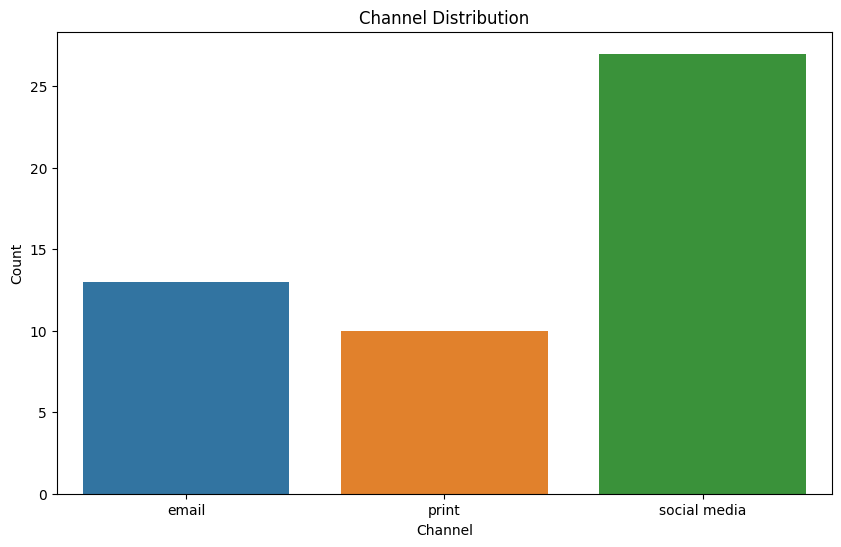

In [8]:
# Display the first few rows of the marketing_campaigns DataFrame
display(marketing_campaigns.head())

# Get summary statistics
display(marketing_campaigns.describe(include='all'))

# Check for missing values
display(marketing_campaigns.isnull().sum())

# Plot the distribution of channels
plt.figure(figsize=(10, 6))
sns.countplot(data=marketing_campaigns, x='channel')
plt.title('Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()


,project_id,client_id,project_name,project_type,start_date,end_date,project_status
0,1,34,deliver real-time technologies,Tax,2021-04-22,2025-03-28,In Progress
1,2,29,whiteboard bricks-and-clicks schemas,Tax,2021-05-28,2024-05-11,In Progress
2,3,83,mesh clicks-and-mortar bandwidth,Advisory,2021-08-12,2024-11-11,In Progress
3,4,63,morph customized schemas,Advisory,2022-09-24,2025-03-17,Cancelled
4,5,66,aggregate extensible vortals,Tax,2023-02-09,2024-08-09,Cancelled


,project_id,client_id,project_name,project_type,start_date,end_date,project_status
count,200.000000,200.000000,200,200,200,200,200
unique,NaN,NaN,200,4,172,170,3
top,NaN,NaN,deliver real-time technologies,Tax,2022-12-05,2025-01-26,In Progress
freq,NaN,NaN,1,58,3,3,73
mean,100.500000,45.650000,NaN,NaN,NaN,NaN,NaN
std,57.879185,26.848683,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,50.750000,24.000000,NaN,NaN,NaN,NaN,NaN
50%,100.500000,43.000000,NaN,NaN,NaN,NaN,NaN
75%,150.250000,68.250000,NaN,NaN,NaN,NaN,NaN


project_id        0
client_id         0
project_name      0
project_type      0
start_date        0
end_date          0
project_status    0
dtype: int64

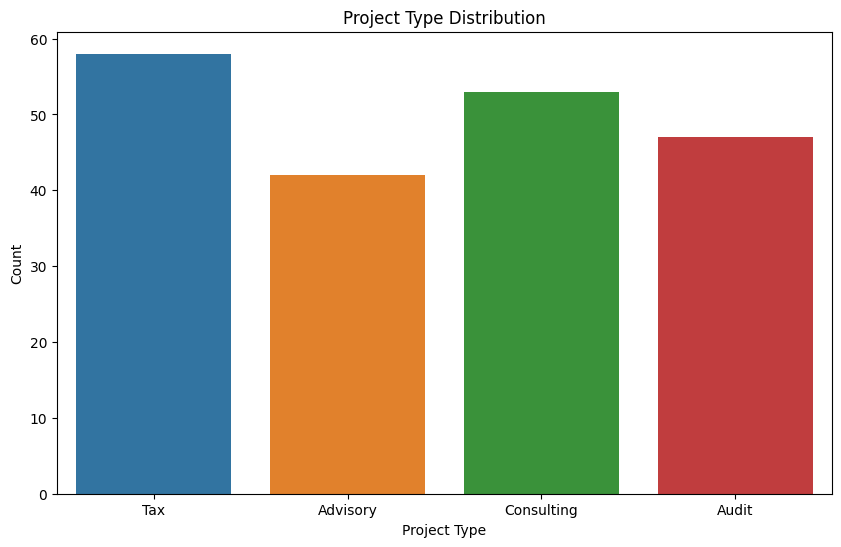

In [9]:
# Display the first few rows of the projects DataFrame
display(projects.head())

# Get summary statistics
display(projects.describe(include='all'))

# Check for missing values
display(projects.isnull().sum())

# Plot the distribution of project types
plt.figure(figsize=(10, 6))
sns.countplot(data=projects, x='project_type')
plt.title('Project Type Distribution')
plt.xlabel('Project Type')
plt.ylabel('Count')
plt.show()


,sales_id,product_service_id,customer_id,employee_id,sale_date,quantity,unit_price,discount,total_amount
0,1,d2c3fda4-de9b-4326-97bf-e7603ca7a451,142,19,2022-06-10,3,254.36,0.29,541.79
1,2,dd0cdec9-f20a-4be6-80ae-93d0c3c1cde7,159,36,2023-01-25,5,141.35,0.01,699.68
2,3,122ef57a-e75d-4d66-8365-bcd317d34266,98,3,2022-05-12,10,308.13,0.27,2249.35
3,4,4b4cd165-2c6c-43cd-8ead-ea068bbece2b,152,18,2022-07-15,6,245.20,0.26,1088.69
4,5,573cf38a-ac68-49cb-b063-11eb9cb0d74e,71,20,2023-03-17,8,364.30,0.28,2098.37


,sales_id,product_service_id,customer_id,employee_id,sale_date,quantity,unit_price,discount,total_amount
count,400.000000,400,400.000000,400.000000,400,400.000000,400.000000,400.000000,400.000000
unique,NaN,400,NaN,NaN,254,NaN,NaN,NaN,NaN
top,NaN,d2c3fda4-de9b-4326-97bf-e7603ca7a451,NaN,NaN,2022-08-27,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,4,NaN,NaN,NaN,NaN
mean,200.500000,NaN,103.307500,24.610000,NaN,5.517500,285.849675,0.150675,1322.983225
std,115.614301,NaN,56.753505,13.880547,NaN,2.924222,125.624639,0.084925,976.701170
min,1.000000,NaN,1.000000,1.000000,NaN,1.000000,56.060000,0.000000,45.100000
25%,100.750000,NaN,58.000000,12.000000,NaN,3.000000,186.467500,0.080000,530.987500
50%,200.500000,NaN,104.000000,25.000000,NaN,5.000000,291.665000,0.140000,1106.690000
75%,300.250000,NaN,152.000000,36.000000,NaN,8.000000,388.650000,0.220000,1931.677500


sales_id              0
product_service_id    0
customer_id           0
employee_id           0
sale_date             0
quantity              0
unit_price            0
discount              0
total_amount          0
dtype: int64

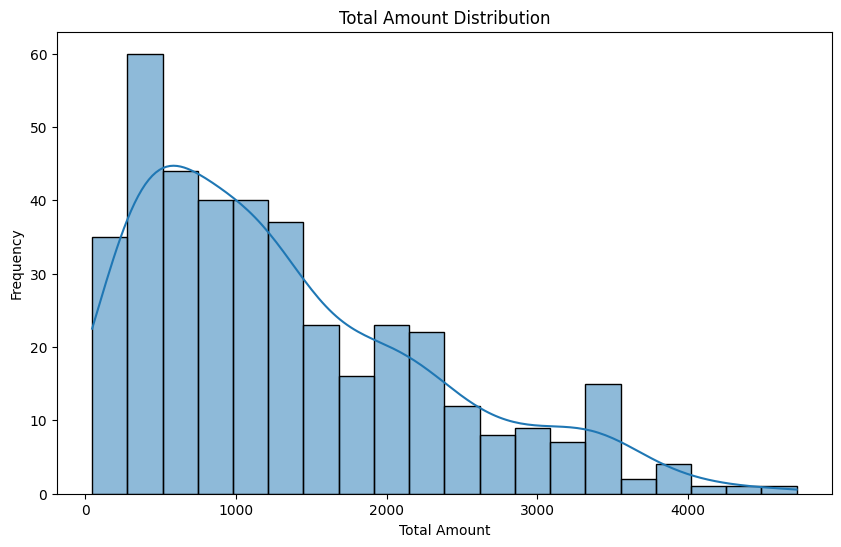

In [10]:
# Display the first few rows of the sales DataFrame
display(sales.head())

# Get summary statistics
display(sales.describe(include='all'))

# Check for missing values
display(sales.isnull().sum())

# Plot the distribution of total amount
plt.figure(figsize=(10, 6))
sns.histplot(sales['total_amount'], kde=True, bins=20)
plt.title('Total Amount Distribution')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()


# 2. Feature Engineering

In [11]:
# Create age groups and spending brackets
customer_behavior['age_group'] = pd.cut(customer_behavior['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])
customer_behavior['spending_bracket'] = pd.cut(customer_behavior['total_spending'], bins=[0, 1000, 5000, 10000], labels=['0-1000', '1001-5000', '5001-10000'])
customer_behavior.head()

,customer_id,age,gender,country,state,city,total_spending,preferred_communication_channel,age_group,spending_bracket
0,1,27,F,Israel,Washington,Martinberg,4430.76,email,18-30,1001-5000
1,2,20,M,Samoa,Illinois,Lutzbury,1887.48,phone,18-30,1001-5000
2,3,43,M,Denmark,Maine,Carsonbury,2895.09,in-person,41-50,1001-5000
3,4,39,M,Cambodia,New Jersey,Johnsonmouth,5464.26,in-person,31-40,5001-10000
4,5,51,F,Macao,Kansas,Davidstad,9524.14,in-person,51-60,5001-10000


In [12]:
# Aggregate features
total_sales_per_employee = sales.groupby('employee_id')['total_amount'].sum().reset_index(name='total_sales_employee')
average_sales_per_customer = sales.groupby('customer_id')['total_amount'].mean().reset_index(name='average_sales_customer')
average_discount_rate = sales['discount'].mean()

# Temporal features
sales['sale_date'] = pd.to_datetime(sales['sale_date'])
sales['day_of_week'] = sales['sale_date'].dt.dayofweek
sales['month'] = sales['sale_date'].dt.month

# Merge aggregated features with the original sales dataframe
sales = sales.merge(total_sales_per_employee, on='employee_id', how='left')
sales = sales.merge(average_sales_per_customer, on='customer_id', how='left')
sales['average_discount_rate'] = average_discount_rate
sales.head()


,sales_id,product_service_id,customer_id,employee_id,sale_date,quantity,unit_price,discount,total_amount,day_of_week,month,total_sales_employee,average_sales_customer,average_discount_rate
0,1,d2c3fda4-de9b-4326-97bf-e7603ca7a451,142,19,2022-06-10,3,254.36,0.29,541.79,4,6,9544.93,908.730,0.150675
1,2,dd0cdec9-f20a-4be6-80ae-93d0c3c1cde7,159,36,2023-01-25,5,141.35,0.01,699.68,2,1,14936.57,545.305,0.150675
2,3,122ef57a-e75d-4d66-8365-bcd317d34266,98,3,2022-05-12,10,308.13,0.27,2249.35,3,5,5488.49,1983.952,0.150675
3,4,4b4cd165-2c6c-43cd-8ead-ea068bbece2b,152,18,2022-07-15,6,245.20,0.26,1088.69,4,7,9289.18,1574.670,0.150675
4,5,573cf38a-ac68-49cb-b063-11eb9cb0d74e,71,20,2023-03-17,8,364.30,0.28,2098.37,4,3,13612.77,1321.276,0.150675


In [13]:
# Feature engineering
marketing_campaigns['start_date'] = pd.to_datetime(marketing_campaigns['start_date'])
marketing_campaigns['end_date'] = pd.to_datetime(marketing_campaigns['end_date'])
marketing_campaigns['duration'] = (marketing_campaigns['end_date'] - marketing_campaigns['start_date']).dt.days
marketing_campaigns['budget_per_lead'] = marketing_campaigns['budget'] / marketing_campaigns['leads_generated']
marketing_campaigns['conversion_rate'] = marketing_campaigns['conversions'] / marketing_campaigns['leads_generated']

# Define success criteria for the marketing campaign
success_threshold = 0.2
marketing_campaigns['success'] = marketing_campaigns['conversion_rate'] > success_threshold
marketing_campaigns.head()


,campaign_id,campaign_name,start_date,end_date,channel,target_audience,budget,leads_generated,conversions,duration,budget_per_lead,conversion_rate,success
0,1,Cloned real-time toolset,2022-05-16,2023-08-20,email,"Teacher, secondary school",9103.20,22,2,461,413.781818,0.090909,False
1,2,Secured maximized toolset,2022-11-04,2023-08-26,email,"Nurse, learning disability",4557.20,33,7,295,138.096970,0.212121,True
2,3,Managed scalable array,2022-12-27,2024-03-07,email,Solicitor,3701.12,73,10,436,50.700274,0.136986,False
3,4,Synergistic 5thgeneration contingency,2022-08-22,2023-05-07,email,Sports coach,9250.70,83,6,258,111.454217,0.072289,False
4,5,Organic zero-defect hardware,2022-08-13,2024-03-12,print,Medical illustrator,3070.17,12,2,577,255.847500,0.166667,False


# 3. Data Pre-Processing

In [14]:
# Check for missing values
print(customer_behavior.isnull().sum())

# Find the most frequent category in the 'age_group' column
most_frequent_age_group = customer_behavior['age_group'].mode()[0]

# Fill missing values with the most frequent category
customer_behavior['age_group'].fillna(most_frequent_age_group, inplace=True)

# Encode categorical variables
customer_behavior_encoded = pd.get_dummies(customer_behavior, columns=['gender', 'age_group', 'spending_bracket', 'preferred_communication_channel'], drop_first=True)
customer_behavior_encoded.head()

customer_id                        0
age                                0
gender                             0
country                            0
state                              0
city                               0
total_spending                     0
preferred_communication_channel    0
age_group                          3
spending_bracket                   0
dtype: int64


,customer_id,age,country,state,city,total_spending,gender_M,age_group_31-40,age_group_41-50,age_group_51-60,age_group_61-70,spending_bracket_1001-5000,spending_bracket_5001-10000,preferred_communication_channel_in-person,preferred_communication_channel_phone
0,1,27,Israel,Washington,Martinberg,4430.76,0,0,0,0,0,1,0,0,0
1,2,20,Samoa,Illinois,Lutzbury,1887.48,1,0,0,0,0,1,0,0,1
2,3,43,Denmark,Maine,Carsonbury,2895.09,1,0,1,0,0,1,0,1,0
3,4,39,Cambodia,New Jersey,Johnsonmouth,5464.26,1,1,0,0,0,0,1,1,0
4,5,51,Macao,Kansas,Davidstad,9524.14,0,0,0,1,0,0,1,1,0


In [61]:
# Check for missing values
print(sales.isnull().sum())

# Encode categorical variables
sales_encoded = pd.get_dummies(sales, columns=['day_of_week', 'month'], drop_first=True)

scaler = StandardScaler()
numeric_columns = ['quantity', 'unit_price', 'discount', 'total_amount', 'total_sales_employee', 'average_sales_customer', 'average_discount_rate']
sales_encoded[numeric_columns] = scaler.fit_transform(sales_encoded[numeric_columns])
sales_encoded.head()

sales_id                  0
product_service_id        0
customer_id               0
employee_id               0
sale_date                 0
quantity                  0
unit_price                0
discount                  0
total_amount              0
day_of_week               0
month                     0
total_sales_employee      0
average_sales_customer    0
average_discount_rate     0
dtype: int64


,sales_id,product_service_id,customer_id,employee_id,sale_date,quantity,unit_price,discount,total_amount,total_sales_employee,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,d2c3fda4-de9b-4326-97bf-e7603ca7a451,142,19,2022-06-10,-0.861991,-0.250979,1.642612,-0.800830,-0.500904,...,0,0,0,1,0,0,0,0,0,0
1,2,dd0cdec9-f20a-4be6-80ae-93d0c3c1cde7,159,36,2023-01-25,-0.177192,-1.151690,-1.658528,-0.638971,0.533806,...,0,0,0,0,0,0,0,0,0,0
2,3,122ef57a-e75d-4d66-8365-bcd317d34266,98,3,2022-05-12,1.534806,0.177578,1.406816,0.949653,-1.279375,...,0,0,1,0,0,0,0,0,0,0
3,4,4b4cd165-2c6c-43cd-8ead-ea068bbece2b,152,18,2022-07-15,0.165208,-0.323986,1.288918,-0.240183,-0.549985,...,0,0,0,0,1,0,0,0,0,0
4,5,573cf38a-ac68-49cb-b063-11eb9cb0d74e,71,20,2023-03-17,0.850007,0.625264,1.524714,0.794878,0.279756,...,1,0,0,0,0,0,0,0,0,0


In [16]:
# Check for missing values
print(marketing_campaigns.isnull().sum())

# Encode categorical variables
marketing_campaigns_encoded = pd.get_dummies(marketing_campaigns, columns=['channel'], drop_first=True)

# Scaling numeric features
numeric_columns = ['duration', 'budget', 'leads_generated', 'conversions', 'budget_per_lead', 'conversion_rate']
marketing_campaigns_encoded[numeric_columns] = scaler.fit_transform(marketing_campaigns_encoded[numeric_columns])
marketing_campaigns_encoded.head()

campaign_id        0
campaign_name      0
start_date         0
end_date           0
channel            0
target_audience    0
budget             0
leads_generated    0
conversions        0
duration           0
budget_per_lead    0
conversion_rate    0
success            0
dtype: int64


,campaign_id,campaign_name,start_date,end_date,target_audience,budget,leads_generated,conversions,duration,budget_per_lead,conversion_rate,success,channel_print,channel_social media
0,1,Cloned real-time toolset,2022-05-16,2023-08-20,"Teacher, secondary school",1.501636,-1.149478,-1.450688,0.400510,1.988970,-0.488595,False,0,0
1,2,Secured maximized toolset,2022-11-04,2023-08-26,"Nurse, learning disability",-0.262785,-0.741072,0.390287,-0.590025,-0.044635,0.324246,True,0,0
2,3,Managed scalable array,2022-12-27,2024-03-07,Solicitor,-0.595052,0.744042,1.494871,0.251333,-0.689322,-0.179604,False,0,0
3,4,Synergistic 5thgeneration contingency,2022-08-22,2023-05-07,Sports coach,1.558885,1.115320,0.022092,-0.810806,-0.241167,-0.613459,False,0,0
4,5,Organic zero-defect hardware,2022-08-13,2024-03-12,Medical illustrator,-0.839940,-1.520756,-1.450688,1.092691,0.823958,0.019430,False,1,0


# 4. Model Selection

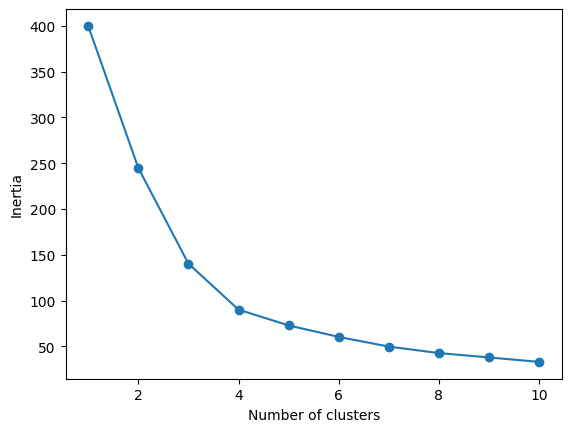

In [29]:
# Customer Segmentation
# Select only numerical columns
numerical_columns = ['age', 'total_spending']
customer_behavior_numerical = customer_behavior[numerical_columns]

# Scale the numerical columns
scaler = StandardScaler()
customer_behavior_preprocessed = scaler.fit_transform(customer_behavior_numerical)

# Determine the optimal number of clusters using the elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_behavior_preprocessed)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Train the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_behavior['cluster'] = kmeans.fit_predict(customer_behavior_preprocessed)

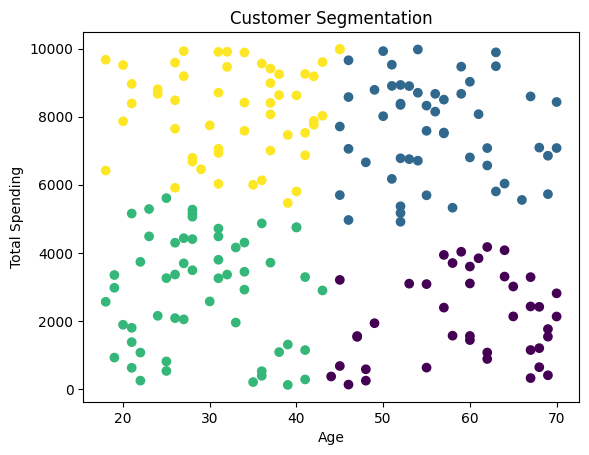

In [40]:
# Create a scatter plot of the customer_behavior DataFrame
plt.scatter(customer_behavior['age'], customer_behavior['total_spending'], c=customer_behavior['cluster'], cmap='viridis')

# Add axis labels
plt.xlabel('Age')
plt.ylabel('Total Spending')

# Add a title
plt.title('Customer Segmentation')

# Display the plot
plt.show()

In [66]:
# Sales Prediction
X_sales = sales_encoded.drop(columns=['sales_id', 'product_service_id', 'customer_id', 'employee_id', 'sale_date','total_amount'])
y_sales = sales_encoded['total_amount']

X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)

linear_regression = LinearRegression()
linear_regression.fit(X_train_sales, y_train_sales)

y_pred_sales = linear_regression.predict(X_test_sales)  

mse = mean_squared_error(y_test_sales, y_pred_sales)  
rmse = np.sqrt(mse)
r2 = r2_score(y_test_sales, y_pred_sales)  

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Squared Error: 0.1291168278374953
Root Mean Squared Error: 0.35932830091365653
R-squared Score: 0.8827067550535053


In [67]:
# Sales Prediction
xgboost_regressor = xgb.XGBRegressor()
xgboost_regressor.fit(X_train_sales, y_train_sales)

y_pred_sales = xgboost_regressor.predict(X_test_sales) 

mse = mean_squared_error(y_test_sales, y_pred_sales)  
rmse = np.sqrt(mse)
r2 = r2_score(y_test_sales, y_pred_sales)  

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 0.018798453958582786
Root Mean Squared Error: 0.13710745405915312
R-squared Score: 0.982922972150814


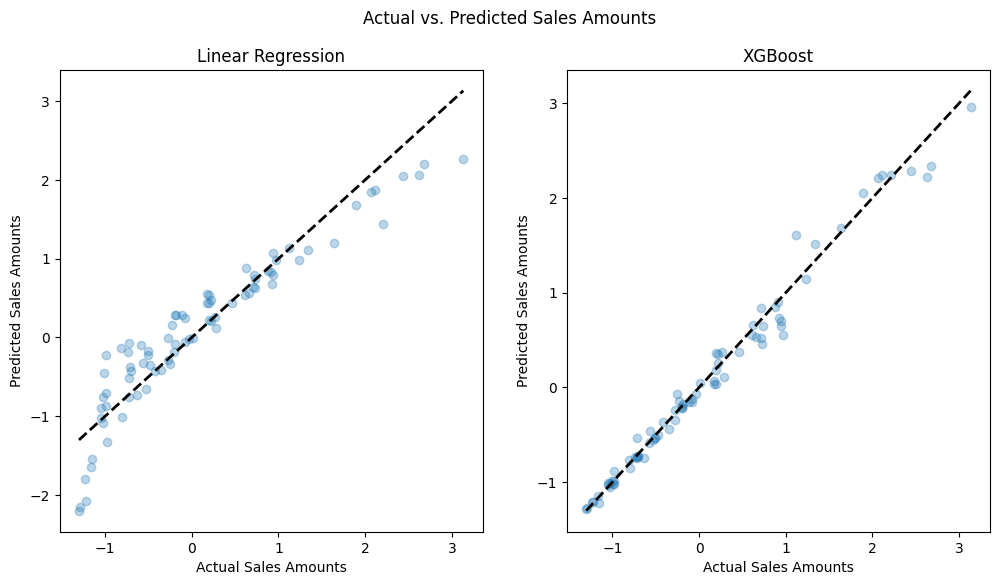

In [68]:
# Linear regression predictions
y_pred_lr = linear_regression.predict(X_test_sales)

# XGBoost predictions
y_pred_xgb = xgboost_regressor.predict(X_test_sales)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Actual vs. Predicted Sales Amounts')

# Linear regression scatter plot
ax1.scatter(y_test_sales, y_pred_lr, alpha=0.3)
ax1.set_title('Linear Regression')
ax1.set_xlabel('Actual Sales Amounts')
ax1.set_ylabel('Predicted Sales Amounts')
ax1.plot([y_test_sales.min(), y_test_sales.max()], [y_test_sales.min(), y_test_sales.max()], 'k--', lw=2)

# XGBoost scatter plot
ax2.scatter(y_test_sales, y_pred_xgb, alpha=0.3)
ax2.set_title('XGBoost')
ax2.set_xlabel('Actual Sales Amounts')
ax2.set_ylabel('Predicted Sales Amounts')
ax2.plot([y_test_sales.min(), y_test_sales.max()], [y_test_sales.min(), y_test_sales.max()], 'k--', lw=2)

# Show the plots
plt.show()

In [69]:
# Marketing Campaign
X_marketing = marketing_campaigns_encoded.drop(columns=['success', 'campaign_id', 'campaign_name', 'start_date', 'end_date','target_audience'])
y_marketing = marketing_campaigns_encoded['success']

X_train_marketing, X_test_marketing, y_train_marketing, y_test_marketing = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_marketing, y_train_marketing)

# Make predictions
y_pred_marketing = logistic_regression.predict(X_test_marketing)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_marketing, y_pred_marketing)
precision = precision_score(y_test_marketing, y_pred_marketing)
recall = recall_score(y_test_marketing, y_pred_marketing)
f1 = f1_score(y_test_marketing, y_pred_marketing)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_marketing, y_pred_marketing))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[12  0]
 [ 0  3]]


In [74]:
# Marketing Campaign
xgboost_classifier = xgb.XGBClassifier()
xgboost_classifier.fit(X_train_marketing, y_train_marketing)

# Make predictions
y_pred = xgboost_classifier.predict(X_test_marketing)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_marketing, y_pred_marketing)
precision = precision_score(y_test_marketing, y_pred_marketing)
recall = recall_score(y_test_marketing, y_pred_marketing)
f1 = f1_score(y_test_marketing, y_pred_marketing)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_marketing, y_pred_marketing))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[12  0]
 [ 0  3]]


# 5. Model Tuning

In [76]:
# Hyperparameters Sales Prediction XGB
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(xgboost_regressor, xgb_params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sales, y_train_sales)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best hyperparameters
best_xgboost_regressor = grid_search.best_estimator_


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [77]:
# Create an XGBoost regressor with the best parameters
optimized_xgboost_regressor = xgb.XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.8
)

# Fit the optimized model on the training data
optimized_xgboost_regressor.fit(X_train_sales, y_train_sales)

# Make predictions with the optimized model
y_pred_optimized = optimized_xgboost_regressor.predict(X_test_sales)

# Calculate evaluation metrics for the optimized model
mse_optimized = mean_squared_error(y_test_sales, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test_sales, y_pred_optimized)

# Print the evaluation metrics for the optimized model
print("Optimized Mean Squared Error:", mse_optimized)
print("Optimized Root Mean Squared Error:", rmse_optimized)
print("Optimized R-squared Score:", r2_optimized)


Optimized Mean Squared Error: 0.0097924858243926
Optimized Root Mean Squared Error: 0.09895698977026635
Optimized R-squared Score: 0.9911042390238927


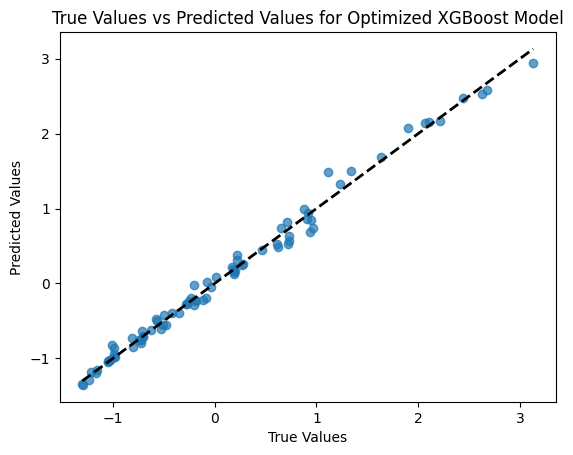

In [78]:
# Make predictions with the optimized model
y_pred_optimized = optimized_xgboost_regressor.predict(X_test_sales)

# Create a scatter plot of true values vs predicted values
plt.scatter(y_test_sales, y_pred_optimized, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values for Optimized XGBoost Model')

# Plot the perfect prediction line
plt.plot([y_test_sales.min(), y_test_sales.max()], [y_test_sales.min(), y_test_sales.max()], 'k--', lw=2)

plt.show()

# 6. Conclusion
**Exploratory Data Analysis (EDA)**:
We began by exploring the datasets, understanding their structure, identifying missing values, and visualizing patterns.

**Feature Engineering**:
Based on our insights from EDA, we created new features and transformed existing ones, such as one-hot encoding categorical variables and generating new features for the sales and marketing_campaigns datasets.

**Data Preprocessing**:
We preprocessed the data by handling missing values, scaling numerical features, and encoding categorical features.

**Model Selection**:
For the three dataframes, we selected appropriate models:
Customer segmentation (k-means clustering)
Sales prediction (Linear Regression and XGBoost Regressor)
Marketing campaigns (Logistic Regression and XGBoost Classifier)

**Model Evaluation**:
We evaluated the performance of each model using relevant metrics:
Elbow method to determine the optimal number of clusters for customer segmentation
Mean Squared Error, Root Mean Squared Error, and R-squared score for sales prediction
Accuracy, Precision, Recall, F1 Score, and Confusion Matrix for marketing campaigns

**Model Tuning**:
We performed hyperparameter tuning for the XGBoost models in sales prediction and marketing campaigns using RandomizedSearchCV. This led to improved performance for the XGBoost models.

